In [15]:
import pandas as pd
ruta_archivo = '/content/data.csv'

try:
    df = pd.read_csv(ruta_archivo, sep=None, engine='python')

    print("✅ ¡Éxito! El archivo se cargó. Aquí están las columnas de Sinergox:\n")
    print(df.columns.tolist())

    print("\nY aquí un vistazo a los primeros datos:")
    display(df.head())

except FileNotFoundError:
    print("ERROR: No se encontró el archivo. Asegúrate de haberlo subido y que se llame 'data.csv'")
except Exception as e:
    print(f"ERROR: {e}")

✅ ¡Éxito! El archivo se cargó. Aquí están las columnas de Sinergox:

['\ufeffFecha', 'Precio Min. Bolsa diario', 'Precio Max. Bolsa diario', 'PPP Bolsa diario', 'Precio Escasez Activación', 'Precio Escasez Ponderado', 'PPP Bolsa Mes', 'Precio Escasez Inferior', 'Precio Escasez Superior', 'Precio Escasez']

Y aquí un vistazo a los primeros datos:


,﻿Fecha,Precio Min. Bolsa diario,Precio Max. Bolsa diario,PPP Bolsa diario,Precio Escasez Activación,Precio Escasez Ponderado,PPP Bolsa Mes,Precio Escasez Inferior,Precio Escasez Superior,Precio Escasez
0,2021-01-01 00:00:00,128.312454,199.312454,153.966261,594.0,574.445029,183.849311,NaN,NaN,460.854849
1,2021-01-02 00:00:00,85.270394,188.960394,134.112017,594.0,574.445029,183.849311,NaN,NaN,460.854849
2,2021-01-03 00:00:00,100.163941,199.163941,139.730708,594.0,574.445029,183.849311,NaN,NaN,460.854849
3,2021-01-04 00:00:00,126.458296,198.458296,155.909734,594.0,574.445029,183.849311,NaN,NaN,460.854849
4,2021-01-05 00:00:00,146.452403,228.452403,173.492292,594.0,574.445029,183.849311,NaN,NaN,460.854849


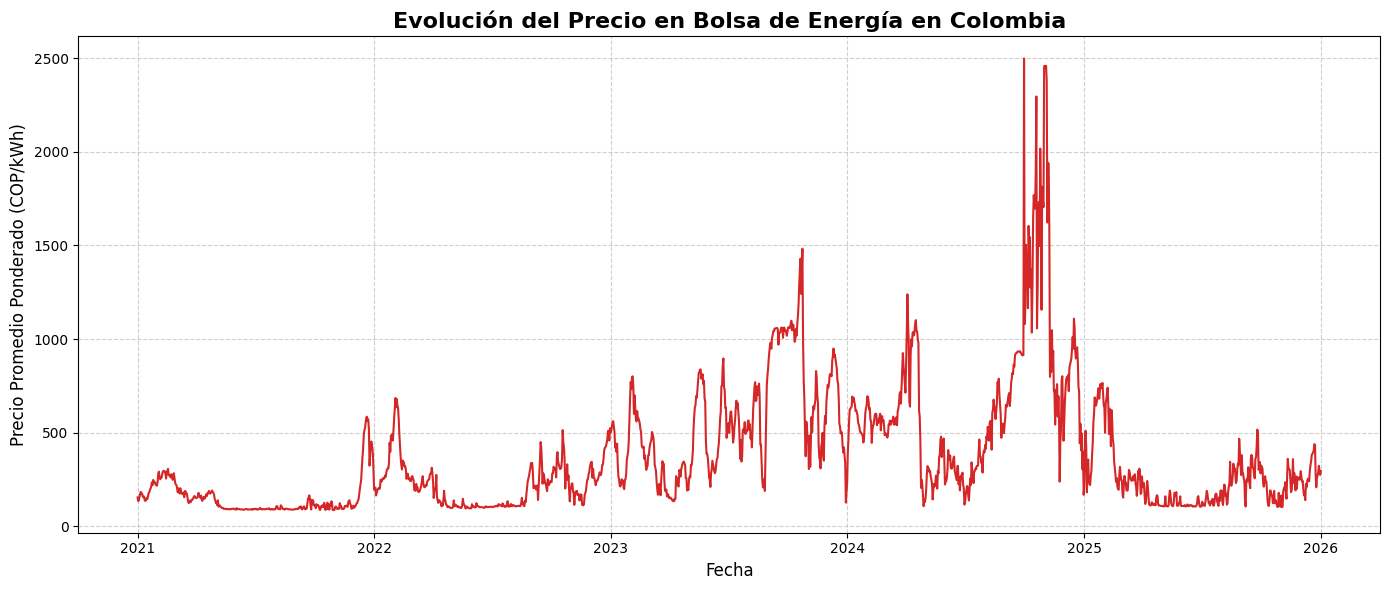

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_archivo = '/content/data.csv'

df = pd.read_csv(ruta_archivo, sep=None, engine='python', encoding='utf-8-sig')

#Convertimos la columna a fechas reales y ordenamos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.sort_values('Fecha')

plt.figure(figsize=(14, 6))

# Graficamos las fechas vs el Precio Promedio
plt.plot(df['Fecha'], df['PPP Bolsa diario'], color='#d62728', linewidth=1.5)

plt.title('Evolución del Precio en Bolsa de Energía en Colombia', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Promedio Ponderado (COP/kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd

ruta_agua = '/content/Reservas Hídricas del SIN Energía .csv'

try:
    df_agua = pd.read_csv(ruta_agua, sep=None, engine='python', encoding='utf-8-sig')

    print(df_agua.columns.tolist())
    print("\nPrimeras 3 filas:")
    display(df_agua.head(3))

except Exception as e:
    print(f"ERROR: {e}")

['Capacidad Útil Energía [GWh]', 'Volumen Útil Energía [GWh]', 'Fecha', 'Cero']

Primeras 3 filas:


,Capacidad Útil Energía [GWh],Volumen Útil Energía [GWh],Fecha,Cero
0,16924.074293,12171.7617,2021-01-01 00:00:00,0
1,16924.074293,12162.1061,2021-01-02 00:00:00,0
2,16924.074293,12162.8840,2021-01-03 00:00:00,0


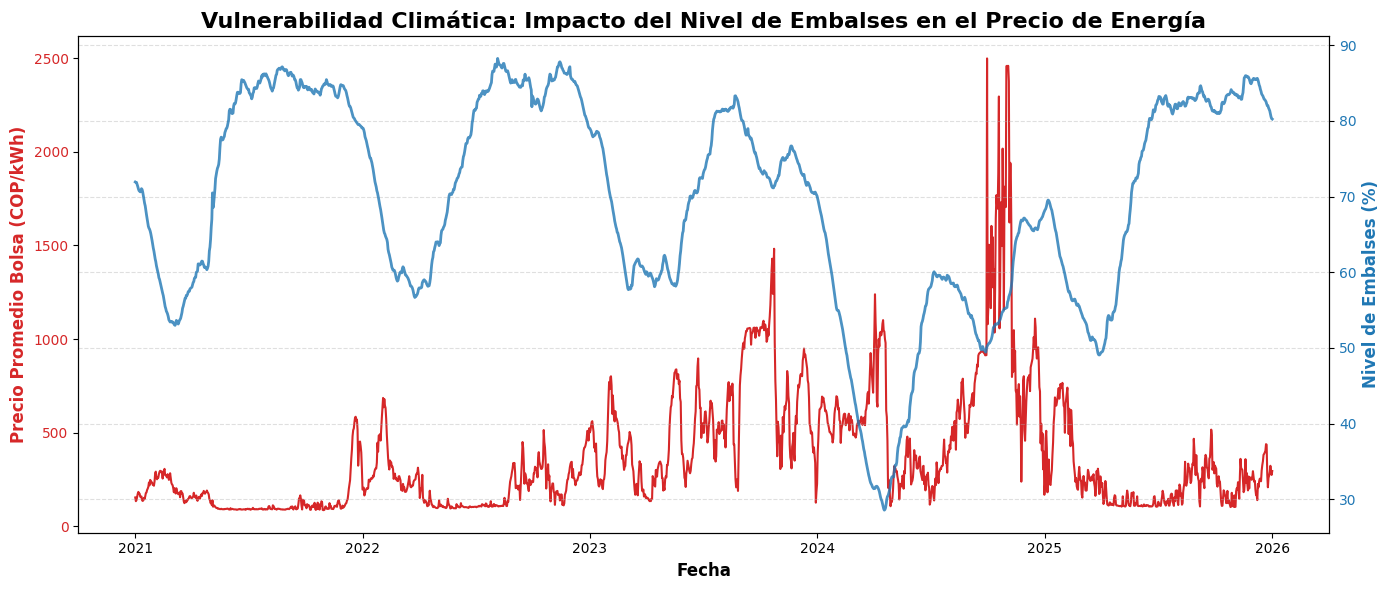

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

ruta_precio = '/content/data.csv'
ruta_agua = '/content/Reservas Hídricas del SIN Energía .csv'

# LEER Y LIMPIAR DATOS DE PRECIO
df_precio = pd.read_csv(ruta_precio, sep=None, engine='python', encoding='utf-8-sig')
df_precio['Fecha'] = pd.to_datetime(df_precio['Fecha'])

# LEER Y LIMPIAR DATOS DE AGUA
df_agua = pd.read_csv(ruta_agua, sep=None, engine='python', encoding='utf-8-sig')
df_agua['Fecha'] = pd.to_datetime(df_agua['Fecha'])

#Calculamos el % de nivel de los embalses
df_agua['Porcentaje_Embalse'] = (df_agua['Volumen Útil Energía [GWh]'] / df_agua['Capacidad Útil Energía [GWh]']) * 100

# 4. EL CRUCE (Unimos ambas tablas por la Fecha)
df_final = pd.merge(df_precio, df_agua, on='Fecha', how='inner')
df_final = df_final.sort_values('Fecha')

#CREACIÓN DE LA GRÁFICA PROFESIONAL
fig, ax1 = plt.subplots(figsize=(14, 6))

# Línea 1: Precio (Eje Y izquierdo, en rojo)
color_precio = '#d62728'
ax1.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio Promedio Bolsa (COP/kWh)', color=color_precio, fontsize=12, fontweight='bold')
ax1.plot(df_final['Fecha'], df_final['PPP Bolsa diario'], color=color_precio, linewidth=1.5, label='Precio Bolsa')
ax1.tick_params(axis='y', labelcolor=color_precio)

# Creamos un segundo eje Y que comparte las mismas fechas (Eje X)
ax2 = ax1.twinx()

# Línea 2: Agua (Eje Y derecho, en azul)
color_agua = '#1f77b4'
ax2.set_ylabel('Nivel de Embalses (%)', color=color_agua, fontsize=12, fontweight='bold')
ax2.plot(df_final['Fecha'], df_final['Porcentaje_Embalse'], color=color_agua, linewidth=2, alpha=0.8, label='Nivel de Agua')
ax2.tick_params(axis='y', labelcolor=color_agua)

# Detalles finales de diseño
plt.title('Vulnerabilidad Climática: Impacto del Nivel de Embalses en el Precio de Energía', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()

plt.show()